# Read data

In [4]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

sp500_price_df = pd.read_csv('Datasets/sp500/sp500_index.csv', index_col='Date')

stocks_price_df = pd.read_csv('Datasets/sp500/sp500_stocks.csv', index_col='Date')[['Symbol','Close']]

data_dict = {}
date_index = next(iter(stocks_price_df.groupby('Symbol')))[1].index
for symbol, data in stocks_price_df.groupby('Symbol'):
    data_dict[symbol] = data['Close']

stocks_price_df = pd.DataFrame(data_dict, index=date_index)
del data_dict
stocks_price_df.dropna(axis=1, inplace=True)
stocks_price_df.head()

,A,AAL,AAPL,ABT,ACGL,ACN,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,AES,AFL,AIG,AIZ,AJG,AKAM,ALB,ALGN,ALL,AMAT,AMD,AME,...,VZ,WAB,WAT,WBA,WBD,WDC,WEC,WELL,WFC,WHR,WM,WMB,WMT,WRB,WST,WTW,WY,WYNN,XEL,XOM,XRAY,YUM,ZBH,ZBRA,ZION
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-01-04,22.389128,4.77,7.643214,26.129908,7.994444,42.070000,37.090000,31.670000,31.469999,37.603161,25.670000,27.760000,34.939999,13.67,23.785000,29.889999,30.160000,22.330000,25.920000,38.090000,18.50,30.410000,14.30,9.70,17.155556,...,31.212946,20.860001,61.630001,37.299999,15.840572,45.259998,24.865000,44.040001,27.320000,81.949997,34.160000,17.616472,18.076668,10.893333,19.735001,70.913910,44.279999,63.959999,21.080000,69.150002,35.330002,25.226456,58.271847,28.670000,13.33
2010-01-05,22.145924,5.31,7.656429,25.918797,7.967778,42.330002,37.700001,31.620001,31.639999,37.401230,25.280001,27.650000,34.540001,13.53,24.475000,29.330000,31.059999,22.209999,26.690001,38.020000,18.01,30.910000,14.19,9.71,17.080000,...,31.269218,20.865000,60.790001,37.000000,16.463976,46.459999,24.540001,44.660000,28.070000,81.779999,34.009998,17.836576,17.896667,10.853333,19.485001,70.754967,45.220001,67.849998,20.830000,69.419998,34.910000,25.140186,60.116505,28.620001,13.80
2010-01-06,22.067240,5.09,7.534643,26.062737,7.933333,42.779999,37.619999,31.559999,31.559999,37.313435,25.340000,27.459999,34.889999,13.39,24.690001,29.139999,30.969999,22.219999,26.469999,38.090000,17.48,30.920000,14.16,9.57,17.097778,...,29.937416,20.995001,60.900002,36.720001,16.709249,46.500000,24.790001,44.439999,28.110001,81.059998,34.000000,18.415367,17.856667,10.875556,19.295000,71.894043,44.720001,66.959999,20.870001,70.019997,35.139999,24.960461,60.097088,28.400000,15.00
2010-01-07,22.038628,5.24,7.520714,26.278646,7.886667,42.740002,36.889999,31.309999,31.230000,37.295876,25.480000,27.200001,35.189999,13.40,24.955000,28.580000,31.350000,22.080000,26.480000,37.820000,17.43,31.080000,14.01,9.47,17.142221,...,29.759218,21.014999,61.160000,36.939999,16.699030,45.590000,24.740000,44.529999,29.129999,82.800003,34.080002,18.284937,17.866667,10.920000,19.355000,71.682121,44.520000,68.389999,20.780001,69.800003,35.599998,24.953272,61.475727,27.690001,16.68
2010-01-08,22.031473,5.14,7.570714,26.412991,7.871111,42.570000,36.689999,31.490000,30.840000,37.243195,26.260000,27.010000,35.610001,13.78,24.705000,29.340000,31.370001,22.139999,26.480000,38.389999,17.66,31.209999,14.55,9.43,17.475555,...,29.777975,21.355000,61.209999,36.990002,16.750128,45.820000,24.885000,44.070000,28.860001,84.559998,34.240002,18.431671,17.776667,10.911111,19.350000,71.602646,44.110001,67.900002,20.790001,69.519997,35.599998,24.960461,60.184467,27.600000,16.41


In [6]:
sp500_price_df.pct_change().head()

,S&P500
Date,
2014-03-03,NaN
2014-03-04,0.015268
2014-03-05,-0.000053
2014-03-06,0.001718
2014-03-07,0.000538


# Inspect S&P 500 index

## Trend plot

array([<Axes: xlabel='Date'>], dtype=object)

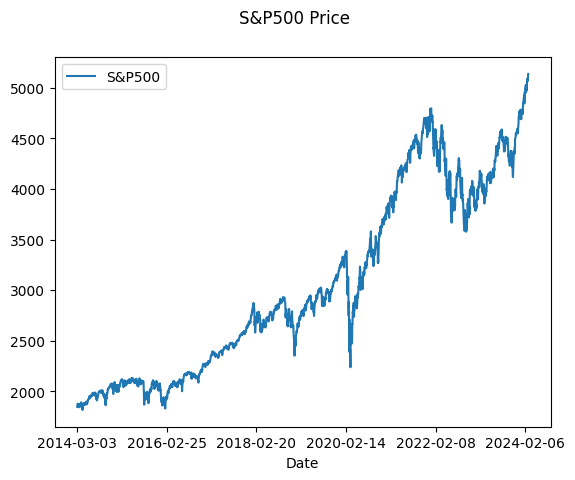

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

sp500_price_df.plot(title='S&P500 Price', subplots=True)

## Stationarity test

In [3]:
from statsmodels.tsa.stattools import adfuller
def adf_stationarity_test(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(key, ':', value)
    if result[1] <= 0.05:
        print("Reject the null hypothesis: the data is stationary")
    else:
        print("Fail to reject the null hypothesis: the data is non-stationary")
adf_stationarity_test(sp500_price_df.values)

ADF Statistic: 0.04954422289260982
p-value: 0.962442548958756
Critical Values:
1% : -3.4329610922579095
5% : -2.8626935681060375
10% : -2.567384088736619
Fail to reject the null hypothesis: the data is non-stationary


## Stationarization using log differencing

In [4]:
sp500_return_df = sp500_price_df['S&P500'].pct_change().dropna()
stocks_return_df = stocks_price_df.pct_change().dropna()

adf_stationarity_test(sp500_return_df.values)

ADF Statistic: -15.803265102020656
p-value: 1.067828062205702e-28
Critical Values:
1% : -3.4329610922579095
5% : -2.8626935681060375
10% : -2.567384088736619
Reject the null hypothesis: the data is stationary


<Axes: title={'center': 'S&P500 Returns'}, xlabel='Date'>

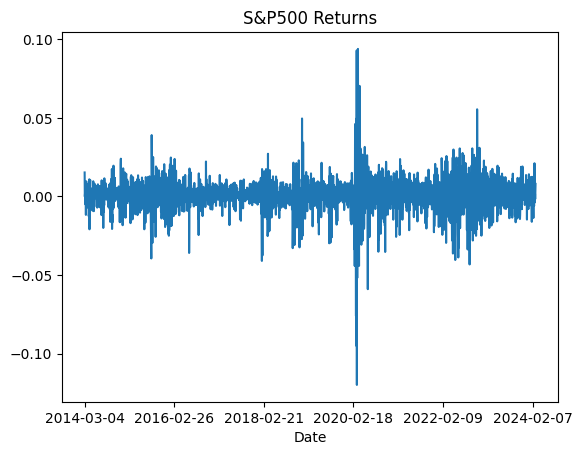

In [5]:
sp500_return_df.plot(title='S&P500 Returns')

### Return distribution

The distribution of the returns depicted in my chart conforms to a leptokurtic distribution, commonly observed in finance.

The distribution of S&P 500 returns shows a higher peak and a smaller standard deviation than sampled stocks. This is consistent with the fact that the S&P 500 is a diversified index, and the returns are less volatile than individual stocks.

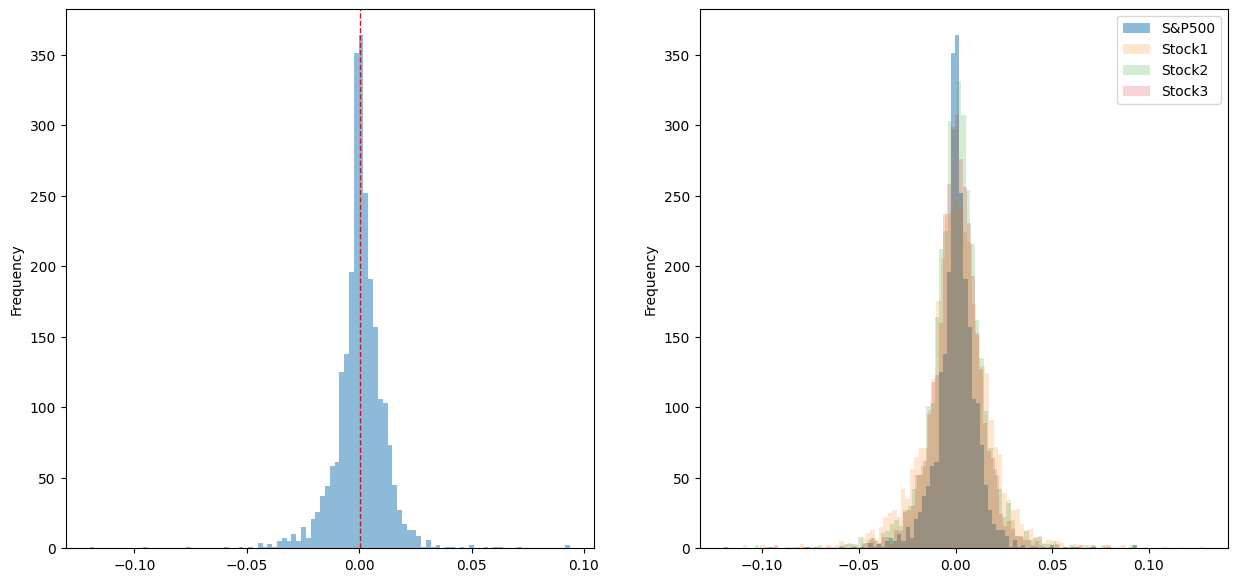

In [79]:
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)

sp500_return_df.plot.hist(bins=100, alpha=0.5)
plt.axvline(sp500_return_df.mean(), color='r', linestyle='dashed', linewidth=1)

plt.subplot(1, 2, 2)
sp500_return_df.plot.hist(bins=100, alpha=0.5)

stocks_return_df.iloc[:,0].plot.hist(bins=100, alpha=0.2)
stocks_return_df.iloc[:,5].plot.hist(bins=100, alpha=0.2)
stocks_return_df.iloc[:,3].plot.hist(bins=100, alpha=0.2)
plt.legend(['S&P500', 'Stock1', 'Stock2', 'Stock3'])
plt.show()

# Inspect stocks

## Correlation matrix

Some stocks' return show linear correlation score up to 0.8

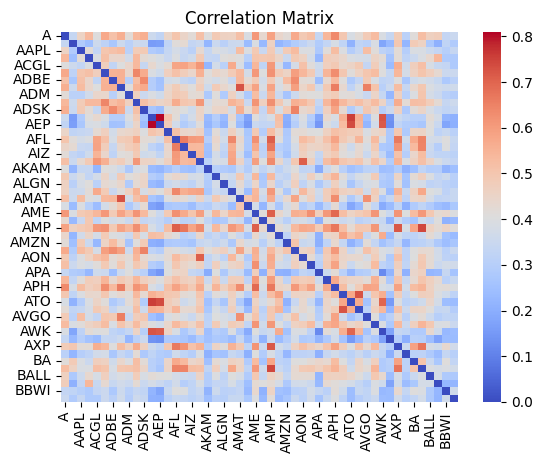

In [18]:
# Corelation 
corr_matrix = stocks_return_df.loc[:,stocks_return_df.columns[:50].tolist()].corr()
for i in range(len(corr_matrix.columns)):
    corr_matrix.iloc[i,i] = 0
# Heatmap
import seaborn as sns
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


## Mutual information

Some stocks' pairs show high mutual information score which indicates non-linear correlation

  0%|          | 0/50 [00:00<?, ?it/s]

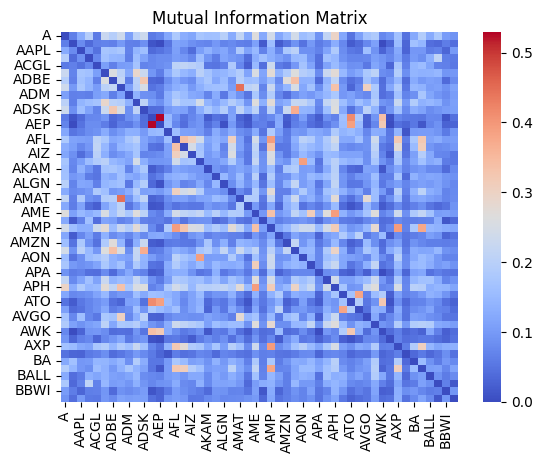

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression
from tqdm.notebook import tqdm

X = stocks_return_df.loc[:, stocks_return_df.columns[:50]]

mi_matrix = np.zeros((X.shape[1], X.shape[1]))

for i in tqdm(range(X.shape[1])):
    for j in range(i+1, X.shape[1]):
        mi = mutual_info_regression(X.iloc[:, i].values.reshape(-1, 1), X.iloc[:, j])
        mi_matrix[i, j] = mi[0]  
        mi_matrix[j, i] = mi[0]

mi_df = pd.DataFrame(mi_matrix, index=X.columns, columns=X.columns)

sns.heatmap(mi_df, annot=False, cmap='coolwarm')
plt.title('Mutual Information Matrix')
plt.show()


## Time lagged analysis

When it comes to prediction, we use past data to predict future data.

Therefore, we need to check the time lagged correlation between stocks.

In the result, we can observe that the correlation and mutual information score are reduced to a large extent 
even when the time lag is small. 

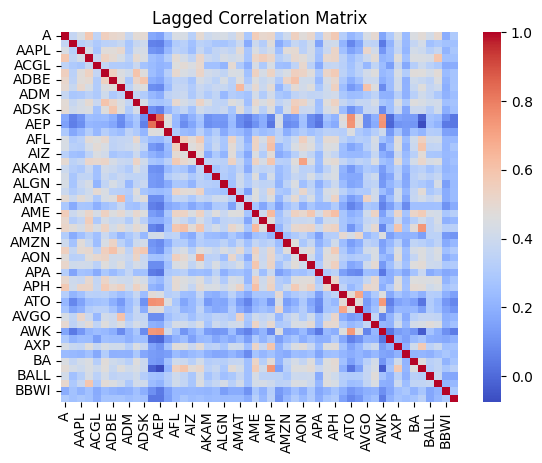

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def lagged_correlation_matrix(X, lag=0):
    """
    Calculate the lagged correlation matrix for a given time lag.
    X: DataFrame containing stock return data, each column is a time series for a stock.
    lag: int, the time lag.
    """
    n = X.shape[1]
    T = X.shape[0]
    corr_matrix = np.zeros((n, n))
    
    for i in range(n):
        for j in range(i, n):
            if lag == 0:
                # Calculate direct correlation for no lag.
                corr = X.iloc[:, i].corr(X.iloc[:, j])
                # corr = 0
            else:
                # Calculate lagged correlation for given lag.
                if i == j:
                    # For diagonal elements, just use 1 since it's the correlation of the series with itself.
                    # corr = 1
                    X_i = X.iloc[lag:, i] if lag > 0 else X.iloc[:T+lag, i]
                    X_j = X.iloc[:T-lag, j] if lag > 0 else X.iloc[-lag:, j]
                    corr = X_i.corr(X_j)
                else:
                    # Ensure we do not exceed the series bounds.
                    X_i = X.iloc[lag:, i] if lag > 0 else X.iloc[:T+lag, i]
                    X_j = X.iloc[:T-lag, j] if lag > 0 else X.iloc[-lag:, j]
                    corr = X_i.corr(X_j)
            corr_matrix[i, j] = corr
            corr_matrix[j, i] = corr  # Correlation matrix is symmetric.
    
    return pd.DataFrame(corr_matrix, index=X.columns, columns=X.columns)

# Example usage
# Assume stocks_return_df is defined and contains stock return data
lagged_corr_matrix = lagged_correlation_matrix(
    stocks_return_df.loc[:, stocks_return_df.columns[:50]], 
                                               lag=1110)

# Plot the heatmap
sns.heatmap(lagged_corr_matrix, annot=False, cmap='coolwarm')
plt.title('Lagged Correlation Matrix')
plt.show()


  0%|          | 0/50 [00:00<?, ?it/s]

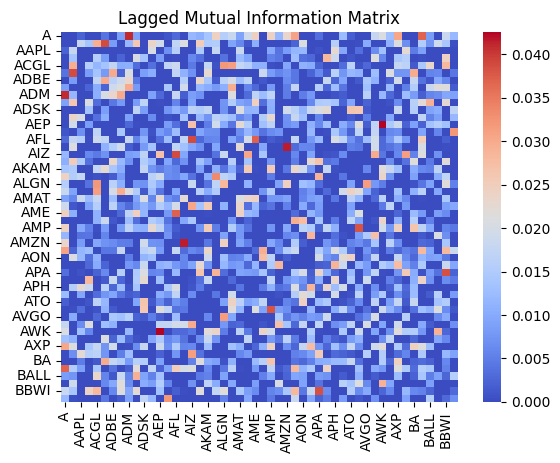

In [61]:
def lagged_mutual_info_matrix(X, lag=0):
    """
    Calculate the lagged mutual information matrix for a given time lag.
    X: DataFrame containing stock return data, each column is a time series for a stock.
    lag: int, the time lag.
    """
    n = X.shape[1]
    T = X.shape[0]
    mi_matrix = np.zeros((n, n))
    for i in tqdm(range(n)):
        for j in range(i , n):
            # Adjust for lag by shifting the series. For lag=0, it uses the original series.
            # mutual_info_regression expects 2D array for X, hence the reshape.
            mi = mutual_info_regression(X.iloc[lag:, i].values.reshape(-1, 1), X.iloc[:T-lag, j])
            mi_matrix[i, j] = mi[0]
            mi_matrix[j, i] = mi[0]  # Mutual information is symmetric.
    
    return pd.DataFrame(mi_matrix, index=X.columns, columns=X.columns)

lagged_mi_matrix = lagged_mutual_info_matrix(
    stocks_return_df.loc[:, stocks_return_df.columns[:50]],
      lag=10)

sns.heatmap(lagged_mi_matrix, annot=False, cmap='coolwarm')
plt.title('Lagged Mutual Information Matrix')
plt.show()